Bitte gehen Sie sicher, dass das Notebook komplett durchläuft bevor Sie die Lösung einreichen!.
Wählen Sie dazu **Kernel -> Restart & Run All**

Füllen Sie alle Stellen aus, an denen Sie `Your Code HERE` oder "YOUR ANSWER HERE" finden. Schließlich tragen Sie Ihren Namen ein in der nächsten Zelle ein.

In [142]:
NAME = "Florian Krax"

---

# Das SciPy Paket
Eine große Sammlung an verschiedensten Funktionalitäten. Die folgenden Übungen sollen ein wenig auf diese aufmerksam machen.

## Die Submodule
Im folgenden werden die einzelnen Module von SciPy geladen. Nutzbar sind sie dann z.B. mit:
```Python
integrate.quad()
```

In [143]:
from scipy import integrate, optimize, interpolate, linalg, ndimage
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

NumPy wird verwendet um einfach Daten zu erzeugen. Mit der Matplotlib können die Ergebnisse dargestellt werden.

# Aufgabe 1 - Integration
Mit SciPy können zwei grundlegend verschiedene Arten von Integration verwendet werden. Die diskrete Integration und die Integration von Funktionen.

## a - Diskrete Integration
Oft sind nur diskrete Werte, z.B. bei der Messung von Versuchsreihen bekannt. Dafür werden die Funktionen
```Python
integrate.trapz()
integrate.cumtrapz()
integrate.simps()
integrate.romb()
```
verwendet. Nutzen Sie alle vier Funktionen für folgende Daten:

In [144]:
x_points = np.linspace(0, 10, 10)
y_points = np.array([1.0, 0.1736, -0.9397, -0.5, 0.766, 0.766, -0.5, -0.9397, 0.1736, 1.0])

In [145]:
# YOUR CODE HERE
trapz = integrate.trapz(x=x_points, y=y_points)
cumtrapz = integrate.cumtrapz(x=x_points, y=y_points)
simps = integrate.simps(y=y_points, x=x_points)
romb = integrate.romb(y=y_points[0:9], dx = float(10)/9)

In [146]:
assert round(trapz, 5) == -0.00022
assert round(simps, 5) == -0.15326
assert np.array_equal(np.round(cumtrapz, 3), [0.652, 0.226, -0.573, -0.426, 0.425, 0.573, -0.227, -0.652, 0.])

Wie unterscheiden sich die Ergebnisse der verschiedenen Integrationsfunktionen, wann ist welche Funktion sinnvoll?

Verschiedenen Integrationverfahren
- Trapez/ "Composite" Trapez -> Annährung der Integration durch Flächeninhalten von Trapzen unterhalb der Funktion
- Simpson -> Annährung des Integrals durch eine Parabel
- Rombard Integration ???

## b - Integration von Funktionen
Ist eine Funktion bekannt, kann auch direkt über diese integriert werden. Dafür werden in der Regel die Funktionen
```Python
integrate.quad()
integrate.dblquad()
itegrate.tplquad()
```
verwendet, je nach Anwendungsfall. Lösen Sie nun folgende Gleichung:
$i = \int_0^1 \mathrm{d}y \int_0^y \mathrm{d}x x^2 \cdot y$

In [147]:
# YOUR CODE HERE
f= lambda x,y: x**2 * y

i, err = integrate.dblquad(f, 0,1, lambda x:0, lambda x:x)

In [148]:
assert round(i, 5) == round(1 / 15,5)

## Aufgabe 2 - Optimization
Das `optimize` Paket hat viele Anwendungsfälle, die Auffälligste ist `curve_fit`. Abgesehen davon gibt es jedoch viele weitere spannende Anwendungsfälle, die namensgebende Optimierung geht doch deutlich weiter als die Kurvenanpassung.

### Kurvenanpassung
Eine der wichtigesten Anwendungsfälle, das Fitten von Kurven an gegebene Daten. Es können beliebige Funktionen an beliebige Daten gefittet werden. Passen Sie die Funktion
$f(x) = a \cdot x^3 + b \cdot x + c \cdot \cos(d \cdot x)$
an die folgenden Daten an:

In [149]:
x_points = np.linspace(-3, 3, 40)
y_points = [-12.561, -3.08, -5.288, -3.27, -3.005, -1.073, 0.076, -2.791, -0.578, -0.402, 4.889, -0.558,
            2.549, -0.645, 2.255, 0.747, 2.181, 5.982, 0.468, 5.099, -1.009, 3.045, 2.104, 1.116, -0.6,
            -2.166, -4.026, -5.148, -9.304, -10.621, -6.754, -3.028, -8.143, -2.574, -0.422, 2.701, 7.793,
            10.045, 7.882, 16.227]

In [150]:
# YOUR CODE HERE
f = lambda x, a, b,c,d: a * x**3 + b * x + c * np.cos(d*x)

p, pcov = optimize.curve_fit(f, x_points, y_points)

p

array([ 0.95332012, -4.46718233,  3.31761496,  1.99896081])

Speichern Sie für den automatischen Test die Werte für `a, b, c, d` in die Variable `p` als
```Python
p = [a, b, c, d]
```

In [151]:
p

array([ 0.95332012, -4.46718233,  3.31761496,  1.99896081])

Stellen Sie in einem Plot die Datenpunkte und den Fit dar.

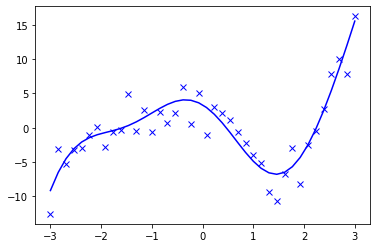

In [152]:
# YOUR CODE HERE
length = len(x_points)
a = np.full((length,), p[0])
b = np.full((length,), p[1])
c = np.full((length,), p[2])
d = np.full((length,), p[3])
value = f(x_points, a, b, c, d)

plt.plot(x_points, y_points, color='b', linestyle='None', marker='x')
plt.plot(x_points, value, color='b')
plt.show()

## Aufgabe 3 - Interpolation
Mit Interpolation wird es möglich Datensätze auf neue Punkte zu erweitern. Es gibt eine große Menge an Anwendungsmöglichkeiten, wobei aber auch immer auf die richtige Anwendung geachtet werden sollte.

### a - 1-D Interpolation
Im einfachsten Fall mit einer Dimension kann man sich die verschiednen Optionen betrachten. Berechnen Sie eine
* lineare
* quadratische
* kubische

Interpolation der folgenden Daten:

In [153]:
x_points = np.linspace(-2, 2, 8)
y_points = np.array([0.38, 1.9481, 0.3256, -1.7719, -2.9082, -2.9266, -2.9498, -5.38])
x_plot = np.linspace(-2, 2, 200)

linear = interpolate.interp1d(x_points, y_points, kind='linear')
qadratic = interpolate.interp1d(x_points, y_points, kind='quadratic')
cubic = interpolate.interp1d(x_points, y_points, kind='cubic')

Stellen Sie alle 3 Interpolationsmöglichkeiten in einem Plot dar und nutzen Sie `x_plot` für die x-Werte des Graphen.

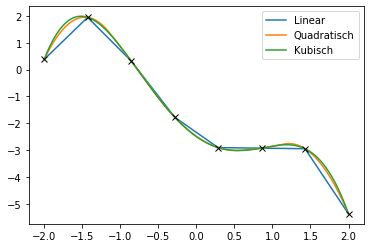

In [154]:
# YOUR CODE HERE

plt.plot(x_plot, linear(x_plot), label = "Linear")
plt.plot(x_plot, qadratic(x_plot), label = "Quadratisch")
plt.plot(x_plot, cubic(x_plot), label = "Kubisch")
plt.plot(x_points, y_points, linestyle='None', color='black', marker='x')
plt.legend()
plt.show()

### b - 2-D Datensätze
Das ganz lässt sich auch problemlos in 2 Dimensionen verwenden. Hier können z.B. zusätzliche Punkte für die Bilddarstellung errechnet werden. Vor allem können aber Datensätze, die nicht auf einem Gitter basieren auf ein solches interpoliert werden.

In [155]:
points = [[0.038, 1.707], [-0.469, -2.031], [-1.89, 0.23], [-3.05, -1.691], [2.835, -1.685], [3.697, 0.209],
          [4.643, 2.875], [-0.389, -2.988], [-1.159, -4.598], [-4.748, -2.183], [4.777, -2.988],
          [-2.313, -4.467], [-3.386, 0.968], [4.098, -0.859], [1.852, 1.741], [-1.279, -0.837],
          [2.018, -4.945], [0.974, -4.908], [1.951, -4.355], [3.558, -2.084], [-2.694, -3.296],
          [1.997, 0.255], [2.402, -1.528], [4.349, 3.802], [4.91, -2.103], [-1.709, 0.096], [-1.28, 1.357],
          [-1.639, 2.765], [-3.392, -4.457], [-2.028, 1.585], [-3.985, 0.135], [0.023, -0.524],
          [-0.033, 3.967], [-3.867, 0.223], [-3.986, -4.924], [-4.333, 1.617], [-0.558, -4.008],
          [-3.794, -4.278], [-3.315, 3.783], [2.153, 0.521], [-4.624, -2.78], [3.974, 4.713],
          [-3.991, 3.727], [-0.312, -0.263], [-1.012, 2.597], [2.344, -3.479], [0.565, -0.039],
          [-3.993, -4.057], [1.216, -3.822], [-3.584, -3.636], [-1.898, -2.769], [4.643, 4.015],
          [3.875, -3.351], [-1.853, 3.692], [-4.229, -4.745], [2.182, -3.34], [-3.27, 4.909],
          [-1.267, -0.892], [-2.916, 0.546], [-1.601, -1.945], [-1.373, -2.899], [-0.362, 2.788],
          [0.637, -2.664], [4.537, -0.281], [4.033, 4.851], [3.963, 0.835], [2.331, -2.966], [3.165, 4.678],
          [-4.865, -2.467], [1.634, 4.091], [-3.305, -0.509], [3.449, -4.721], [1.837, -3.851],
          [4.077, -2.891], [-0.36, -3.79], [-2.855, 4.334], [-4.232, -1.513], [3.523, -2.701],
          [3.637, -3.421], [-2.277, 1.645], [-1.758, 0.255], [-4.847, 1.499], [4.855, 0.331],
          [-2.227, -1.455], [2.605, 1.883], [1.339, -1.142], [-4.036, 2.452], [2.741, -2.258],
          [-3.939, 2.467], [1.528, 4.501], [-1.533, 0.113], [-4.897, -3.676], [-2.512, -4.132],
          [-2.215, -4.591], [1.95, 0.833], [4.72, 2.338], [0.777, -2.38], [-1.16, 1.33], [-0.149, -4.46],
          [2.495, 1.589]]
values = [0.089, 0.67, -2.096, -1.869, 1.378, 3.567, -2.252, 1.104, 4.984, -4.371, 3.348, 4.715, -2.762,
          4.428, 2.866, -0.367, -6.042, -4.813, -5.157, 2.639, 1.635, 2.213, 0.703, -4.963, 4.499, -1.802,
          -2.297, -3.065, 0.969, -2.846, -3.875, 0.01, -0.119, -3.695, -0.58, -1.489, 2.357, -0.557, 1.696,
          2.516, -3.601, -6.296, 3.949, -0.229, -2.475, -2.883, 0.544, -1.287, -3.99, -0.679, 2.27, -5.971,
          1.839, -3.042, -1.162, -2.952, 3.158, -0.292, -2.93, 1.042, 2.676, -1.052, -1.433, 4.769, -6.816,
          3.011, -1.945, -2.31, -4.049, 3.336, -3.282, -1.022, -4.352, 2.837, 1.448, 0.379, -4.419, 1.777,
          1.122, -2.801, -1.995, -2.063, 4.462, -0.511, 2.496, 0.016, 0.547, 0.29, 0.461, 3.537, -1.644,
          -2.321, 3.626, 5.139, 2.557, -0.491, -1.379, -2.132, 0.754, 2.705]

Stellen Sie die Daten in einem 2D Plot da. Nutzen Sie die Interpolation um die benötigten Daten zu berechnen.

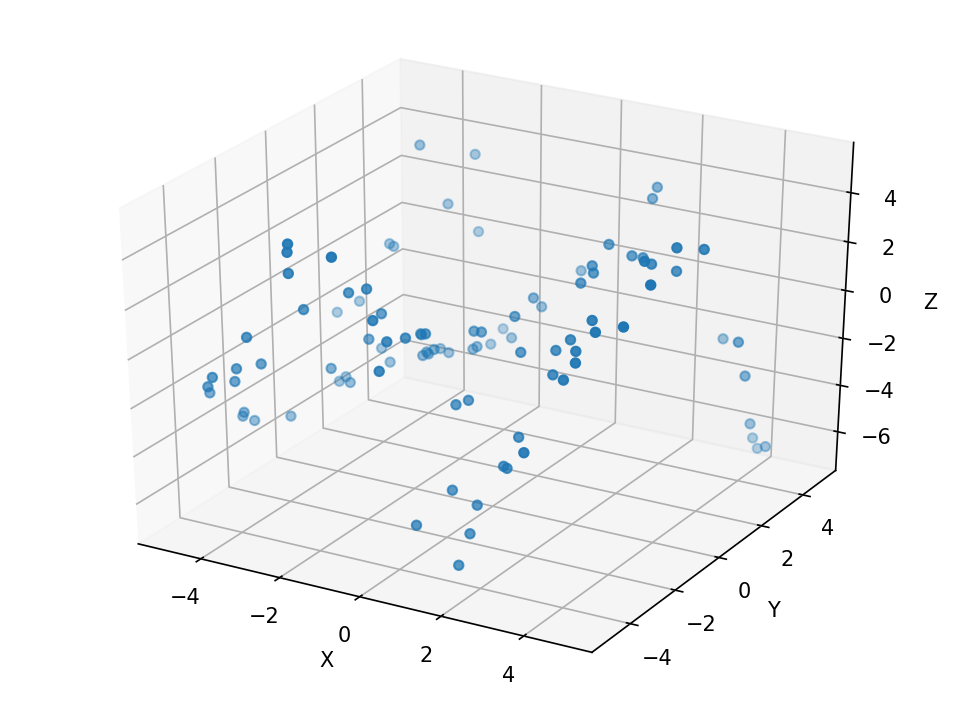

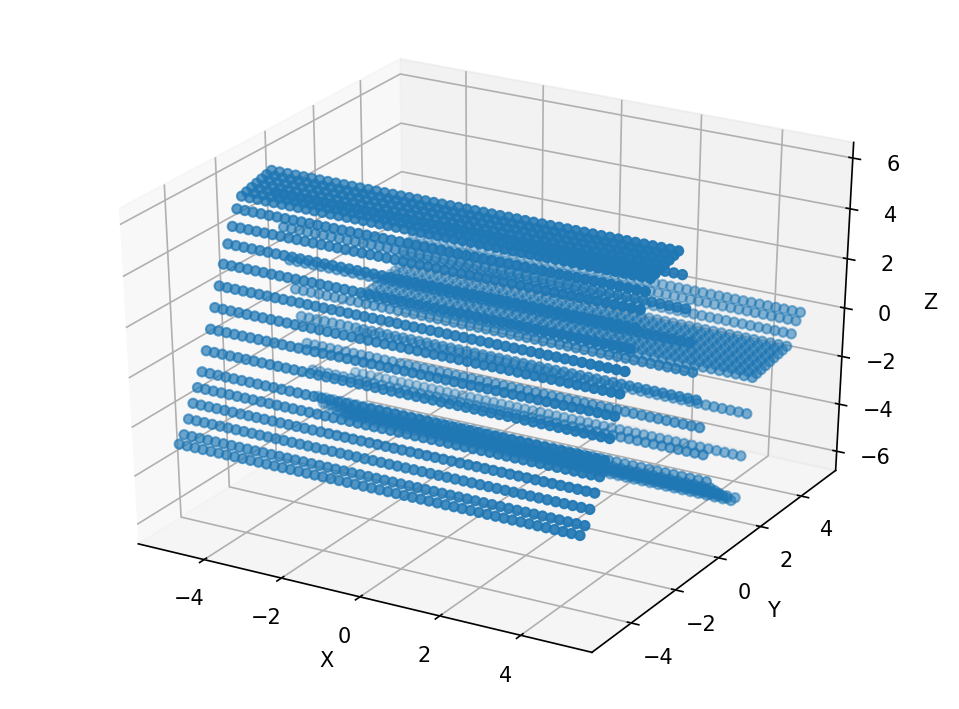

In [156]:
# YOUR CODE HERE

# Ich verwende hier eine 3D Darstellung. Wie man im Chart sieht sind die Values nur von Y abhängig. Somit würde auch eine darstellung Z über Y funktionieren. Welche dann nur 2D wäre
points = np.array(points)
zeros = np.zeros(len(values))

func = interpolate.interp2d(points[:,0], points[:,1], np.array(values))

fig = plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(points[:,0], points[:,1], np.array(values))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



#plt.plot(points[:,0], func(points[:,0], zeros))


plt.show()
resolution = 50
x_test = np.linspace(-5,5,resolution)
y_test = np.linspace(-5,5,resolution)

x_testmesh, y_testmesh = np.meshgrid(x_test, y_test)
x_testmesh = x_testmesh.reshape(resolution*resolution)
y_testmesh = y_testmesh.reshape(resolution*resolution)

z_test = func(x_testmesh, y_testmesh)
fig = plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_testmesh, y_testmesh, z_test[0, :])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()


## Aufgabe 4 - Lineare Algebra
Viele Verfahren beruhen auf dem Lösen von Gleichungssystemen, etwa das Knotenpotentialverfahren für die Lösung von elektrischen Schaltungen oder die Finite Elemente Methode für die Lösung von schwierigen partiellen Differentialgleichungen, etwa in der Strömungsmechanik. Mit `linalg` steht auch hier ein Modul zur Verfügung.

### a - Lösen von Gleichungssystemen

Lösen Sie das Gleichungssystem

$A x = b$

für $b = [1, 0, 0, 2]$ und $A = \begin{pmatrix} 1 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
0 & 0 & 0 & 1\end{pmatrix}$

nach $x$ auf.

In [157]:
# YOUR CODE HERE
A = np.array([[1,0,0,0], [-1,2,-1,0], [0,-1,2,-1], [0,0,0,1]])
b = np.array([1,0,0,2])
x = np.linalg.solve(A,b)
x

array([1.        , 1.33333333, 1.66666667, 2.        ])

In [158]:
assert np.array_equal(np.round(x, 5), [1., 1.33333, 1.66667, 2.])

### b - Diverse andere Funktionen
Es findet sich noch eine große Sammlung an anderen nützlichen Funktionen, berechnen Sie für die Matrix $A$ aus der vorherigen Aufgabe die
* inverse Matrix `inverse_matrix`
* Determinante `det_matrix`
* Eigenvektoren `eig_values`
* Eigenwerte `eig_vectors`

In [159]:
# YOUR CODE HERE
inverse_matrix = linalg.inv(A)
det_matrix = linalg.det(A)
eig_values, eig_vectors = linalg.eig(A)
eig_values

array([3.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [160]:
assert np.array_equal(np.round(inverse_matrix, 5),
                      [[1., 0., 0., -0.], [0.66667, 0.66667, 0.33333, 0.33333],
                       [ 0.33333, 0.33333, 0.66667, 0.66667], [0., 0., 0., 1.]])
assert det_matrix == 3
assert np.array_equal(eig_values, [3., 1., 1., 1.])
assert np.array_equal(np.round(eig_vectors, 5), [[ 0., 0., 0., 0.],
                                                 [-0.70711, 0.70711, 0.70711, 0.70711],
                                                 [ 0.70711, 0.70711, 0.70711, 0.70711],
                                                 [ 0., 0., 0., 0.]])

## Aufgabe 5 - Glättung
Manchmal sind Daten stark verrauscht, dann hilft eine Glättung. Hier bietet SciPy eine Menge Möglichkeiten, jetzt beschränken wir uns jedoch auf `gaussian_filter1d` und `gaussian_filter` aus dem `ndimage` Modul

### a - Der 1D Fall
Glätten Sie und stellen Sie dar für $\sigma=0.5$, $\sigma=1.5$ und $\sigma=5$

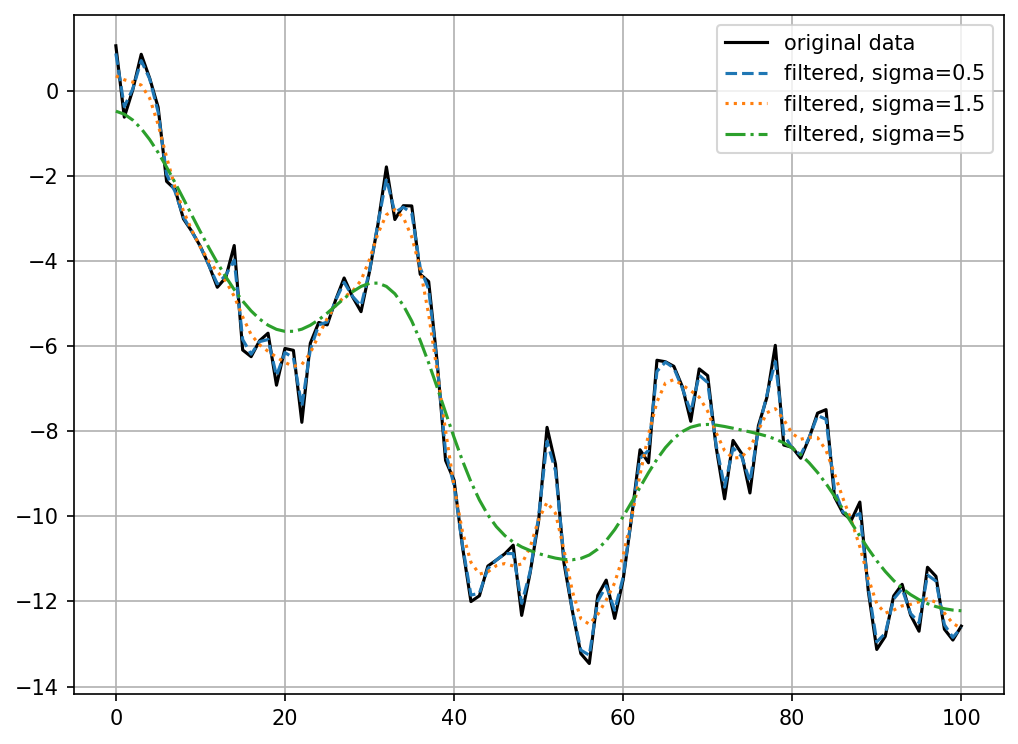

In [161]:
# YOUR CODE HERE
np.random.seed(280490)
plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
x = np.random.randn(101).cumsum()
y05 = ndimage.gaussian_filter1d(x, 0.5)
y15 = ndimage.gaussian_filter1d(x, 1.5)
y5 = ndimage.gaussian_filter1d(x, 5)
plt.plot(x, 'k', label='original data')
plt.plot(y05, '--', label='filtered, sigma=0.5')
plt.plot(y15, ':', label='filtered, sigma=1.5')
plt.plot(y5, '-.', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()

### b - Der 2D Fall
Verrauschte Bilder können durch einen Gaußfilter wieder klarer werden, wobei auch ein starker weichzeichnender Effekt auftritt. Gegeben ist das Bild `moon.png` nutzen Sie einen Gaußfilter um das Rauschen zu reduzieren. Können Sie die blaue Farbe des Himmels wiederherstellen?

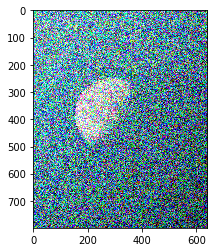

In [162]:
im = plt.imread('moon.png')
plt.imshow(im)
plt.show()


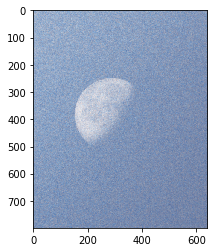

In [163]:
# YOUR CODE HERE
result = ndimage.gaussian_filter(im, sigma=1.1)
plt.imshow(result)
plt.show()